# Multiple Lineer Regresyon - Proje : Advertising

Advertising.csv adlı veri setini kullanarak TV - Radio -Newspaper - Sales arasındaki ilişkiye bakacağız.

Amacımız TV - Radio - Newspaper bütçesi ile Satış arasındaki ilişkiyi Multiple Lineer Regresyon ile modellemek.

Bunun için bir lineer model kuracağız.

* **Adımlar**

    1- Önce datayı ham olarak inceleyelim

    2- Datayı import edelim

    3- Datayı inceleyelim (head, describe, info)

    4- Datayı görselleştir

    5- Modeli oluştur (formuller)

    6- Hazırlık

    7- Train-Test Split

    8- Multiple Lineer Regresyon Modelini Çalıştır (Fit - Prediction Hazırlığı)

    9- Katsayıları Hesaplama (intercept_, coef_)

    10- Tahmin Yap (Predict)

    11- Gerçek Data ve Tahmin Datasını Çiz

    12- Hataları Çiz ($y - \hat y$)

    13- Model Doğruluğunu Kontrol Et (RMSE, ve $R^2$)
    
    14- OLS - p-değerini incele

    15- Korelasyon

    16- Sonuçlara göre tekrar Model oluştur

    17- Yorumlar

***

### 1- Önce Datanın İşlenmemiş Halini İnceleyelim

* Datanın Analizi
    * Sütunlar neler?
    * Feature (X) ve Label(y) sütunu ne?
    * Toplam kaç kayıt var?
    * Eksik data var mı?
        * NA (Not Available)
        * NaN: Not a Number

***

### 2- Datayı Import Edelim

In [1]:
# Gerekli kütüphaneleri import edelim

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### 2- Datayı İnceleyelim [head(), describe(), info()]# Dataframe'i oluşturalım

adv_df = pd.read_csv("data/Advertising.csv", index_col=0)

***

### 2- Datayı İnceleyelim [head(), describe(), info()]

In [3]:
# İlk 5 satırı gözlemleyelim

adv_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
# Son 5 satırı gözlemleyelim

adv_df.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [5]:
# Dataframe'in genel bilgilerini görelim

adv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [6]:
# Temel istatistiksel bilgilere erişelim

adv_df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


***

### 4- Datayı Görselleştirelim

* Exploratory Data Analysis (EDA)

https://seaborn.pydata.org/generated/seaborn.pairplot.html

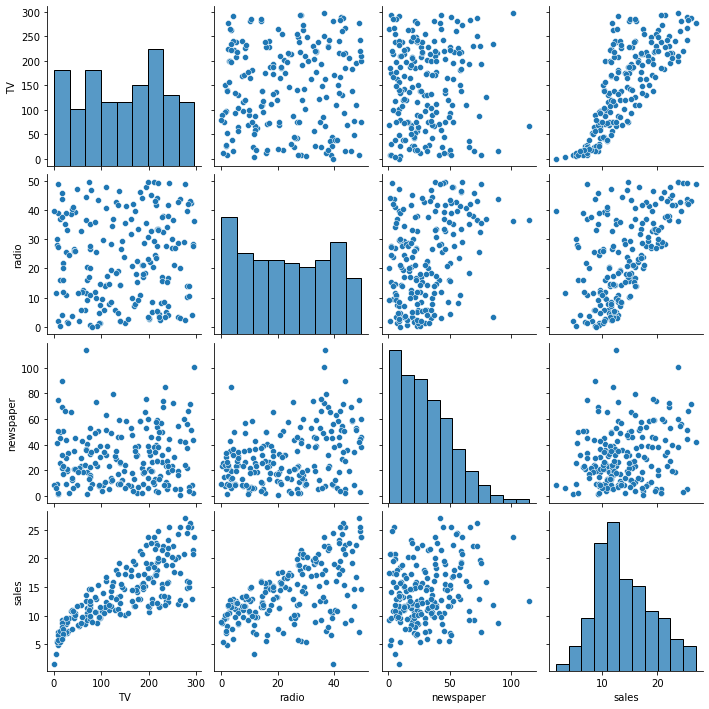

In [7]:
# pairplot -> İkili grafik çizeceğiz.

sns.pairplot(adv_df)
plt.show()

In [8]:
# X -> Input(Feature)
X = adv_df[["TV", "radio", "newspaper"]]

# y -> Output
y = adv_df["sales"]

In [9]:
# X'in tipi

type(X)

pandas.core.frame.DataFrame

In [10]:
X

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [11]:
# y'nin tipi

type(y)

pandas.core.series.Series

In [12]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64

In [13]:
adv_df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [14]:
adv_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


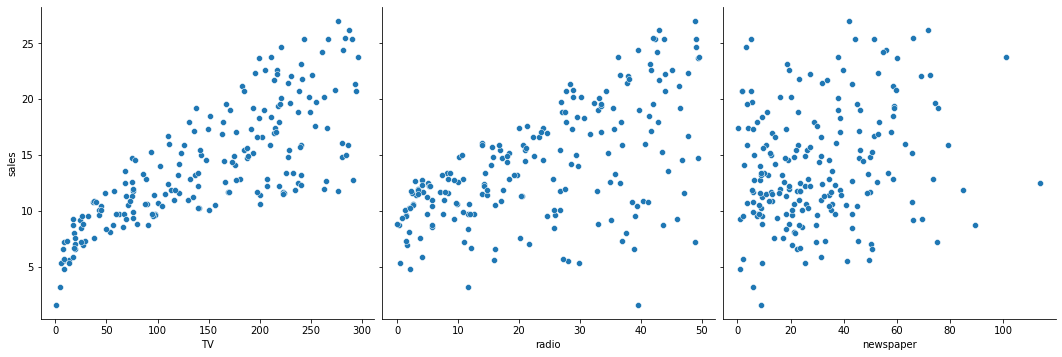

In [15]:
# Sadece Girdiler - Çıktı İlişkisini Görselleştirelim

sns.pairplot(adv_df, x_vars=adv_df.columns[0:3], y_vars=adv_df.columns[3], height=5)
plt.show()

***

### 5- Modeli Oluştur

* Multiple Lineer Regresyon Modeli

$$y = \beta_0 + \beta_1 * X_1 + \beta_2 * X_2 + \beta_3 * X_3$$

In [16]:
# sklearn paketinin LinearRegression modülünü import edelim.

from sklearn.linear_model import LinearRegression

In [17]:
# Bir adet lineer regresyon nesnesi yaratalım

linear_reg = LinearRegression()

***

### 6- Data'yı Multiple Lineer Regresyon için Hazır Hale Getirelim

* Boyut kontrolü yapmamız lazım.

shape -> `(n_samples, n_features)`

shape -> `(n, p)`

In [18]:
# Önce Input ve Output'un şekline bakalım
# X'in şekli

print(f"X(Input)'in şekli: {X.shape}")

X(Input)'in şekli: (200, 3)


In [19]:
# y'nin şekli

print(f"y(Output)'nin şekli: {y.shape}")

y(Output)'nin şekli: (200,)


* Yukarıda X ile y'nin şekil yapısına baktık. X regresyon için uygun bir yapıdayken(vektörel) y uygun bir yapıda değildir. Bu neden y'yi reshape edeceğiz.

In [20]:
# y - Output için (200, 1) şeklinde yeniden şekillendirme yapalım.
# y : (200, 1) -> 200 adet Örnek Gözlem, 1 adet Sütun/Feature(Label)

y = y.values.reshape(-1, 1) # -1 : 200 adet satırı tut(values), 1 : Bir adet boyut ekle

In [21]:
print(f"y(Output)'nin yeni şekli/boyutu: {y.shape}")

y(Output)'nin yeni şekli/boyutu: (200, 1)


***

### 7- Train - Test Split

* Toplam 200 adet olan verimizi Train-Test olacak şekilde ikiye ayıracağız.

* Train: %70

* Test: %30

* Train Data: X_train, y_train

* Test Data: X_test, y_test$

In [22]:
# Scikit-Learn'den Train-Test modülünü import edelim

from sklearn.model_selection import train_test_split

In [23]:
# train_test_split() metodu geriye X_train, X_test, y_train, y_test değerlerini döner
# Train Data -> X_train, y_train
# Test Data -> X_test, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [24]:
# Şekilleri print edelim
# Yukarıda gördüğünüz üzere test için toplam verinin %30'unu train için ise toplam verinin %70'ini ayırdık.
# Toplam 200 verimiz olduğuna göre train için 140 test için 60 veri ayrılır.

print(f"X_train'in şekli/boyutu: {X_train.shape}")
print(f"y_train'in şekli/boyutu: {y_train.shape}")
print(f"X_test'in şekli/boyutu: {X_test.shape}")
print(f"y_test'in şekli/boyutu: {y_test.shape}")

X_train'in şekli/boyutu: (140, 3)
y_train'in şekli/boyutu: (140, 1)
X_test'in şekli/boyutu: (60, 3)
y_test'in şekli/boyutu: (60, 1)


***

### 8- Lineer Regresyon Modelini Çalıştıralım (Fit)

In [25]:
# Regresyonu çalıştır -> fit
# fit -> öğrenme, train data üzerinden
# Aslında aşağıdaki işlem katsayıları yani Beta(^)'ları hesaplar, onları öğrenir.

linear_reg.fit(X_train, y_train)

LinearRegression()

***

### 9- Katsayıları Hesaplama (intercept_ -> $\hat \beta_0$, coef_  -> $\hat \beta_1$, $\hat \beta_2$, $\hat \beta_3$)

Multiple Lineer Regresyonu fit etmenin amacı katsayıları hesaplamaktır.

$\hat \beta_0$ -> intercept

$\hat \beta_1$, $\hat \beta_2$, $\hat \beta_3$ -> slope (coefficient)

In [26]:
# intercept -> Beta_0

print(f"Intercept: {linear_reg.intercept_}")

Intercept: [2.65278967]


In [27]:
# slope = coefficent -> [[Beta_1, Beta_2, Beta_3]]

print(f"Slope(Coefficent - Eğim): {linear_reg.coef_}")

Slope(Coefficent - Eğim): [[0.0454256  0.18975773 0.00460308]]


In [28]:
coefficents = pd.DataFrame(linear_reg.coef_, columns=["Beta_1 (TV)", "Beta_2 (Radio)", "Beta_3 (Newspaper)"])

In [29]:
# Katsayıları yazdıralım

coefficents

,Beta_1 (TV),Beta_2 (Radio),Beta_3 (Newspaper)
0,0.045426,0.189758,0.004603


$$\hat y = \hat \beta_0 + \hat \beta_1X_1 + \hat \beta_2X_2 + \hat \beta_3X_3$$

$$\hat y = 2.6527 + 0.0454 * X_1 + 0.1897 * X_2 + 0.0046 * X_3$$

* **ARTIK KATSAYILARIMIZI HESAPLADIK YANİ ÖĞRENDİK**
* **Newspaper feature'unun katsayısının çok küçük olduğuna dikkat edin. Buradan $\hat \beta_3$ 'ün $\hat y$ 'ye çok da etki etmediğini anlıyoruz.**

* HATIRLARMA : Multiple Lineer Regresyon modeli ile çalışırken temel olarak iki bilgiyi ortaya çıkarmayı amaçlıyoruz. Bunlar:
    1. Tahmin işleminde hangi değişkenler önem arz ediyor? (TV, RADIO, NEWSPAPER)
    2. Önemli olan değişkenlerden hangileri ne derecede önemli?

***

### 10- Tahmin Yapma (Predict)

Regresyon katsayılarımızı hesapladığımıza göre test verisi (X_test) üzerinden y'leri tahmin edebiliriz -> `y_pred`

Gerçek y değerleri y_test değişkeni içerisinde mevcut. Onları tahmin doğruluğunu kontrol ederken kullanacağız.

In [30]:
# Tahmin yapalım
# Bunun için X_test kullanacağız çünkü X_train ile öğrenme işlemini gerçekleştirdik.

y_pred = linear_reg.predict(X_test)

In [31]:
# Tahmini değerlerimizi yazdıralım
y_pred

array([[10.62160072],
       [20.00625302],
       [16.91850882],
       [19.17040746],
       [20.94974131],
       [13.12284284],
       [11.80740696],
       [12.32019766],
       [20.57806782],
       [20.95662688],
       [10.79096475],
       [19.54868702],
       [ 6.42403866],
       [15.23133391],
       [ 8.97226257],
       [ 7.89897862],
       [16.23599497],
       [12.02636477],
       [17.09702178],
       [11.26080277],
       [16.97826292],
       [ 9.75655721],
       [20.82389762],
       [17.20916742],
       [15.13816239],
       [21.97290698],
       [19.20181841],
       [10.07501899],
       [19.39017185],
       [14.8673761 ],
       [14.36798893],
       [ 7.55604543],
       [ 9.96742165],
       [14.76342565],
       [ 7.20995576],
       [13.60003295],
       [ 7.49088656],
       [11.70865932],
       [13.46091883],
       [15.2229793 ],
       [17.18088277],
       [13.56738329],
       [14.30942267],
       [13.72909849],
       [11.88559349],
       [ 8

In [32]:
# Tahmin verisinin şeklini yazdıralım

y_pred.shape

(60, 1)

In [33]:
# Test verisinin şeklini yani orijinal output verisinin şeklini yazdıralım

y_test.shape

(60, 1)

***

### 11- Gerçek Data ve Tahmin Datasını Çizmek

Artık test verilerinden yani gerçek dünyadan bahsediyoruz. Train verisi ile işimiz bitti çünkü modeli eğitme işini tamamladık.

* Gerçek Lablel -> y_test
* Tahmini Label -> y_pred
* Input -> X_test

In [34]:
# İlk 10 gerçek y değerlerini görelim

y_test[0:10]

array([[ 6.6],
       [20.7],
       [17.2],
       [19.4],
       [21.8],
       [12.2],
       [12.2],
       [11.7],
       [22.6],
       [22.3]])

In [35]:
# İlk 10 tahmin y değerlerini görelim

y_pred[0:10]

array([[10.62160072],
       [20.00625302],
       [16.91850882],
       [19.17040746],
       [20.94974131],
       [13.12284284],
       [11.80740696],
       [12.32019766],
       [20.57806782],
       [20.95662688]])

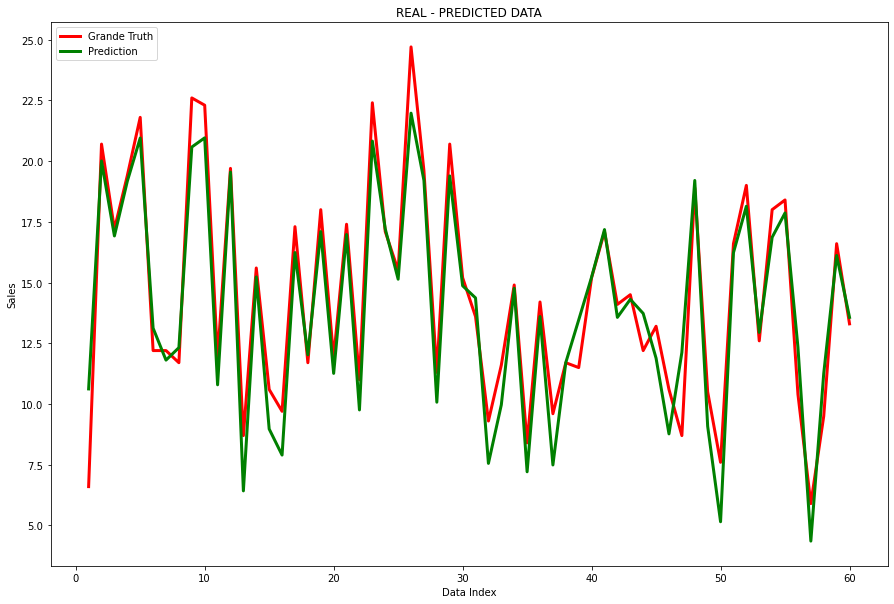

In [36]:
# Her bir tahmin noktasındaki değişimi görelim
indexes = range(1, 61)

# Gerçek Data -> Grand Truth
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(indexes, y_test, label="Grande Truth", color="red", linewidth=3)

# Tahmin -> Prediction
ax.plot(indexes, y_pred, label="Prediction", color="green", linewidth=3)

plt.title("REAL - PREDICTED DATA")
plt.xlabel("Data Index")
plt.ylabel("Sales")
plt.legend(loc="upper left")
plt.show()

***

### 12- Hataları Çiz ($y - \hat y$)

**Hata : Residual -> ($y - \hat y$)**

$y - \hat y$ = y_test - y_pred


In [37]:
import numpy as np

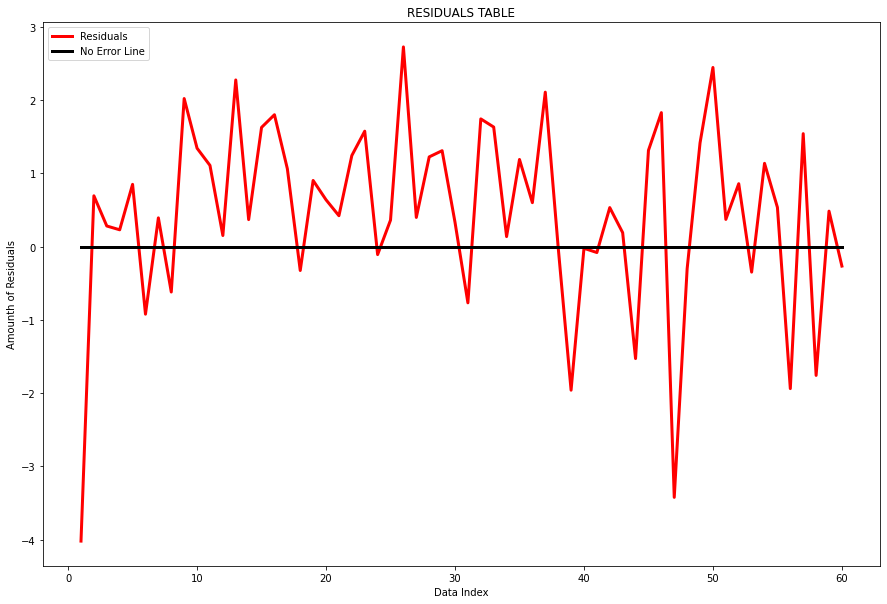

In [38]:
# Her bir tahmin noktasındaki hatayı görelim
indexes = range(1, 61)
residuals = y_test - y_pred

# Residuls Data -> Hatalar
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(indexes, residuals, label="Residuals", color="red", linewidth=3)

# Sıfır doğrusunu çizelim
ax.plot(indexes, np.zeros(60), label="No Error Line", color="black", linewidth=3)

plt.title("RESIDUALS TABLE")
plt.xlabel("Data Index")
plt.ylabel("Amounth of Residuals")
plt.legend(loc="upper left")
plt.show()

***

### 13- Model Doğruluğunu Kontrol Et (RMSE, ve $R^2$)

**RMSE**: Root Mean Squared Error : MSE'nin karekökü.

$R^2$: `Coefficient of Determination`.

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [39]:
# sklearn kütüphanesini import edelim

In [40]:
from sklearn.metrics import r2_score, mean_squared_error

In [41]:
# R^2 değerini hesaplayalım

r_2 = r2_score(y_test, y_pred)

In [42]:
# R^2'yi yazdır

print(f"R^2 : {r_2}")

R^2 : 0.9058622107532247


In [43]:
# R^2 değerini % olarak yazıralım

print(f"%R^2 : {r_2 * 100}")

%R^2 : 90.58622107532247


In [44]:
# MSE -> RMSE

mse = mean_squared_error(y_test, y_pred)

In [45]:
# MSE'yi yazdır

print('MSE:', mse)

MSE: 1.850681994163694


In [46]:
# RMSE
import math

rmse = math.sqrt(mse)

In [47]:
# RMSE'yi yazdır

print('RMSE:', rmse)

RMSE: 1.3603977338130544


***

### 14- OLS (Ordinary Least Squares)

In [48]:
import statsmodels.api as sm

/home/can/anaconda3/envs/introMlEnv/lib/python3.10/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

In [49]:
# statsmodels modülünü kullanarak OLS() (Ordinary Least Squares) metodunu çalıştıracağız.
# statsmodels OLS metodu beta_0 için otomatik olarak değer atamaz.
# Bu nedenle beta_0 için 1 katsayısını bizim eklememiz lazım.
# Bu katsayıyı add_constant() metodu ile ekleyebiliriz.

X_train_ols = sm.add_constant(X_train)

In [50]:
X_train

,TV,radio,newspaper
75,213.4,24.6,13.1
4,151.5,41.3,58.5
186,205.0,45.1,19.6
27,142.9,29.3,12.6
91,134.3,4.9,9.3
...,...,...,...
88,110.7,40.6,63.2
104,187.9,17.2,17.9
68,139.3,14.5,10.2
25,62.3,12.6,18.3


In [51]:
X_train_ols

,const,TV,radio,newspaper
75,1.0,213.4,24.6,13.1
4,1.0,151.5,41.3,58.5
186,1.0,205.0,45.1,19.6
27,1.0,142.9,29.3,12.6
91,1.0,134.3,4.9,9.3
...,...,...,...,...
88,1.0,110.7,40.6,63.2
104,1.0,187.9,17.2,17.9
68,1.0,139.3,14.5,10.2
25,1.0,62.3,12.6,18.3


In [52]:
# statsmodels OLS modeli oluştur
# OLS() önce y sonra X alır.

sm_model = sm.OLS(y_train, X_train_ols)

In [53]:
# OLS modelinin sonuçlarını al

result = sm_model.fit()

In [54]:
# OLS Özet tablosunu yazdır

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           9.97e-66
Time:                        18:29:44   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

**OLS Sonucu**: Newspaper feature'unun p-değeri 0.05'ten büyük olduğu için bu değişkenin sonuç üzerinde herhangi bir etkisi yok. Bundan dolayı Newspaper sütununu dataframe'den çıkaracağız.

***

### 15- Korelasyon (Correlation)

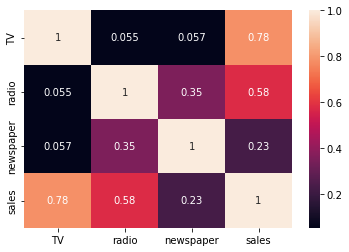

In [55]:
sns.heatmap(adv_df.corr(), annot=True)
plt.show()

***

### 16- Sonuçlara Bağlı Olarak Yeni Model Oluşturmak

Yukarıda bahsettiğimiz üzere Newspaper feature'u önemsiz olduğu için veri setimizden çıkarıp modelimizi revize edeceğiz.

In [56]:
# Yeni feature matrisi
# X_train_new
# X_test_new

X_train_new = X_train[["TV", "radio"]]

In [57]:
X_train_new.head()

,TV,radio
75,213.4,24.6
4,151.5,41.3
186,205.0,45.1
27,142.9,29.3
91,134.3,4.9


In [58]:
X_test_new = X_test[["TV", "radio"]]

In [59]:
X_test_new.head()

,TV,radio
127,7.8,38.9
105,238.2,34.3
100,135.2,41.7
93,217.7,33.5
112,241.7,38.0


In [60]:
# Modeli tekrar kurgulayalım

linear_reg.fit(X_train_new, y_train)

LinearRegression()

In [61]:
# Yeni tahminleri alalım

y_pred_new = linear_reg.predict(X_test_new)

In [62]:
# Yeni tahminleri yazdıralım

y_pred_new

array([[10.56198847],
       [20.16735504],
       [16.90186462],
       [19.07993718],
       [21.03892699],
       [13.13621118],
       [11.80982028],
       [12.39007729],
       [20.59914742],
       [21.04083466],
       [10.88508869],
       [19.38624121],
       [ 6.37517955],
       [15.33164571],
       [ 8.96088175],
       [ 7.95144449],
       [16.38791571],
       [11.97017124],
       [17.24725749],
       [11.20901475],
       [17.11470022],
       [ 9.70819803],
       [20.79788275],
       [17.20749366],
       [15.18035107],
       [22.18189008],
       [19.17555656],
       [10.05518823],
       [19.5883307 ],
       [14.98424867],
       [14.39922454],
       [ 7.65095995],
       [ 9.84543862],
       [14.78150095],
       [ 7.22855505],
       [13.69168479],
       [ 7.43358375],
       [11.75347003],
       [13.50004784],
       [15.057806  ],
       [17.06957807],
       [13.68351323],
       [14.23222825],
       [13.70744537],
       [11.96487996],
       [ 8

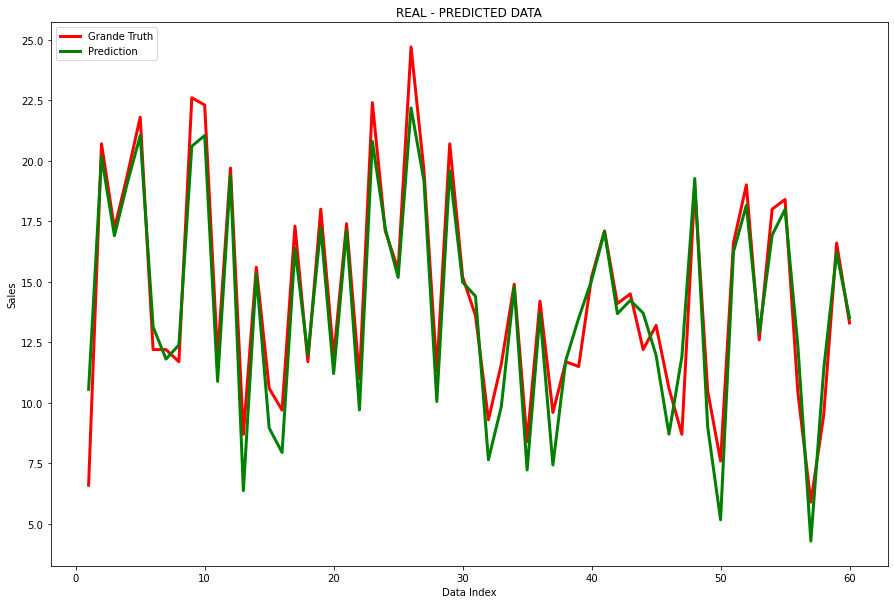

In [63]:
# Her bir tahmin noktasındaki değişimi görelim
indexes = range(1, 61)

# Gerçek Data -> Grand Truth
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(indexes, y_test, label="Grande Truth", color="red", linewidth=3)

# Tahmin -> Prediction
ax.plot(indexes, y_pred_new, label="Prediction", color="green", linewidth=3)

plt.title("REAL - PREDICTED DATA")
plt.xlabel("Data Index")
plt.ylabel("Sales")
plt.legend(loc="upper left")
plt.show()

In [64]:
# Yeni OLS'i görelim

X_train_new_ols = sm.add_constant(X_train_new)

In [65]:
# statsmodels kütüphanesini kullanarak OLS modelini yeniden oluşturalım.

sm_model = sm.OLS(y_train, X_train_new_ols)

In [66]:
# OLS modelinin sonuçlarını alalım

result = sm_model.fit()

In [67]:
# OLS özet tablosuna yazdıralım

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           4.46e-67
Time:                        18:29:44   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.0

**Halihazırda elimizde iki değişken var: TV ve Radio. OLS tablomuzu analiz ettiğimizde bu değişkenlerin p-değerlerinin 0.05'ten küçük olduğunu görüyoruz. Dolayısıyla bu iki değişken modelimiz için önemlidir diyebiliriz.**

***

**Backward Elimination**

Eğer böyle değil de, herhangi birinin p-değeri 0.05'ten büyük olsaydı onu da çıkarıp tekrar bir Lineer Regression çalıştıracaktık. Bu döngü bu şekilde devam eder. Ta ki tüm değişkenler önemli olarak kalana kadar.

***

### İSPAT: NEWSPAPER DEĞİŞKENİ GERÇEKTEN ÖNEMSİZ Mİ?

* Bu soruya cevap verebilmek için salt Newspaper - Sales ilişkisine bakalım.

In [68]:
# X -> Input(Feature)
X = adv_df['newspaper']

# Y -> Output(Label)
y = adv_df['sales']

# Yeniden boyutlandırmamız lazım
X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# statsmodels OLS
X_train_ols = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_ols)
result = model.fit()

# OLS Özet tablosunu yazdır
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     14.65
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           0.000195
Time:                        18:29:44   Log-Likelihood:                -430.09
No. Observations:                 140   AIC:                             864.2
Df Residuals:                     138   BIC:                             870.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4844      0.763     15.052      0.0

**Gördüğünüz gibi R-Squared : $R^2 = 0.096$ yani (%9.6) olarak çıktı.**

* Bu oran tahmin işlemi için çok düşük. Dolayısı ile Newspaper'ın gerçekten bir tahmin değeri yok.

***

### **Adjustes R-Square**

* Multiple Lineer Regresyon yönteminde, Backward Selection'ı bir örnekle gördük.

* Başka bir çözüm yolu ise Forward Selection'dır.

* Forward Selection'da, belli bir sayıda değişken ile başlanır ve her seferinde yeni bir değişken eklenerek ilerlenir.

* Her yeni değişken demek biraz daha tahmin oranının ($R^2$) iyileşmesi/artması demek. (En kötü ihtimalle aynı kalır.)

* Ama bu artma yanıltıcı olabilir. Sırf bir değişken eklediğimiz için $R^2$ nin artması çok doğru olmaz.

* Bunu egale etmek için **Adjusted** $R^2$ vardır. Yani sırf yeni bir değişken eklendiği için artan $R^2$ değerini bir miktar aşağı düşürerek doğru orana çeker.

* Dolayısı ile Multiple Lineer Regression analizlerinde, Adjusted $R^2$ daha güvenilir olarak kabul edilir.